## Final Project: Machine Learning in Social Media App Development
# Objective:

Your task is to build a comprehensive business case for a machine learning-driven feature set for a new social media app. Following this, you will design and implement two machine learning algorithms that address specific aspects of your business case. This assignment is designed to simulate a real-world application of machine learning in a business context.

## Algorithm 1

### Implementation:
> 1.Select Two ML Algorithms: Based on your business case, select two algorithms to implement.

▪ Algorithm 1: Logistic Regression for Sentiment Analysis

Allign to "Sentiment analysis: NLP models for social media sentiment"

In [4]:
#Sentiment140 dataset with 1.6 million tweets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.metrics import roc_curve 

import seaborn as sns

### Implementation:
> 2.Dataset Preparation: Identify and preprocess datasets. Document the steps for cleaning, labeling, and splitting the data.

In [6]:
#Reading
df = f = pd.read_csv("sentiment140.csv", encoding="latin-1")
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
#Labeling
column_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv("sentiment140.csv", encoding="latin-1", names=column_names)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
#Cleaning

import re

# Filter only tweets with sentiment 0 (negative) or 4 (positive), then map to 0 and 1
df_filtered = df[df['target'].isin([0, 4])].copy()
df_filtered['target'] = df_filtered['target'].apply(lambda x: 0 if x == 0 else 1)

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)      # Remove URLs
    text = re.sub(r"@\w+", "", text)         # Remove mentions
    text = re.sub(r"#\w+", "", text)         # Remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove punctuation and numbers
    text = text.lower().strip()              # Convert to lowercase and trim spaces
    return text

df_filtered['clean_text'] = df_filtered['text'].apply(clean_tweet)

In [9]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['clean_text'],
    df_filtered['target'],
    test_size=0.2,
    random_state=42,
    stratify=df_filtered['target']
)

In [10]:
# Display sample cleaned tweets
df_filtered[['text', 'clean_text', 'target']].sample(5, random_state=42)

,text,clean_text,target
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh i hope your ok,0
750,"@misstoriblack cool , i have no tweet apps fo...",cool i have no tweet apps for my razr,0
766711,@TiannaChaos i know just family drama. its la...,i know just family drama its lamehey next tim...,0
285055,School email won't open and I have geography ...,school email wont open and i have geography s...,0
705995,upper airways problem,upper airways problem,0


### Implementation:
> 3.Model Development: Train, test, and evaluate your models. Use appropriate metrics to demonstrate model effectiveness.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

In [14]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.765384375
ROC AUC Score: 0.7653843750000001

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    160000
           1       0.75      0.79      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


Confusion Matrix:
 [[117998  42002]
 [ 33075 126925]]


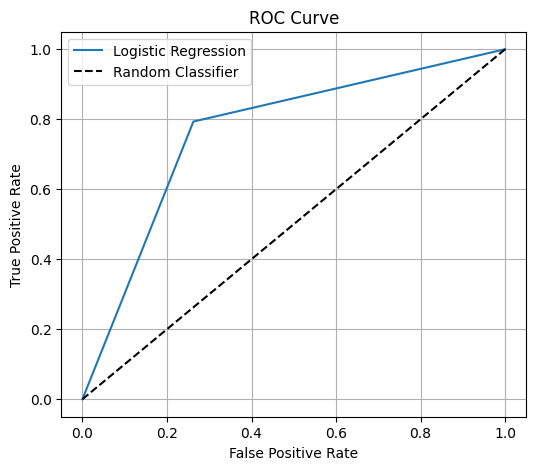

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


### Implementation:
> 4.Deployment Plan: Outline a high-level strategy for integrating these algorithms into the social media app.

The sentiment analysis model, built using Logistic Regression, reached an accuracy of 76.5% and a ROC AUC score of 0.765. It showed balanced performance when identifying positive and negative posts, with precision, recall, and F1-scores around 0.77. These results suggest that the model works well for short and informal texts, like social media posts.

The idea is to integrate this model into the app so that it runs right after a user submits a post. As soon as the text is posted, it will be analyzed by the model and labeled as either positive or negative. Based on this result, the app can personalize the content shown to the user. For example, if the post has a negative tone, the platform could suggest more uplifting or encouraging content to improve the user’s experience.

Over time, the app could also use sentiment trends (anonymously) to better understand the emotional patterns of its users and offer features that support mental well-being. If the system notices frequent negative posts, it could gently suggest breaks or share positive reminders.

Since the model is lightweight, it can run in the background as a simple cloud service without affecting performance. It’s fast enough to work in real time and won’t slow down the app. To keep the predictions accurate and relevant, the model should be retrained occasionally with updated data, especially as language and expressions change over time.